<a href="https://colab.research.google.com/github/shiffa-04/FlightPricePredictor/blob/main/Flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd
df = pd.read_csv("Clean_Dataset.csv")
profile = ProfileReport(df, title = 'Flight_Price')
profile.to_file("Flight_Prediction_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(1)

In [ ]:
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 12)

In [ ]:
df = df.drop(["Unnamed: 0", "flight"], axis = 1)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
categorial_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers =[
        ('cat', categorial_transformer, ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'] )
        ]
)
transformed_data = preprocessor.fit_transform(df)
transformed_df = pd.DataFrame(transformed_data.toarray(), columns=preprocessor.get_feature_names_out())
transformed_df.head()

,cat__airline_AirAsia,cat__airline_Air_India,cat__airline_GO_FIRST,cat__airline_Indigo,cat__airline_SpiceJet,cat__airline_Vistara,cat__source_city_Bangalore,cat__source_city_Chennai,cat__source_city_Delhi,cat__source_city_Hyderabad,...,cat__arrival_time_Morning,cat__arrival_time_Night,cat__destination_city_Bangalore,cat__destination_city_Chennai,cat__destination_city_Delhi,cat__destination_city_Hyderabad,cat__destination_city_Kolkata,cat__destination_city_Mumbai,cat__class_Business,cat__class_Economy
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X = df.drop("price", axis = 1)
y = df["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
linear_reg = LinearRegression()
linear_reg_pre = linear_reg.fit(X_train,y_train)

In [ ]:
y_train_pred = linear_reg_pre.predict(X_train)

# Predict on test set
y_test_pred = linear_reg_pre.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calculate R2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R2 score:", train_r2)
print("Testing R2 score:", test_r2)

Training MSE: 48845644.397370726
Testing MSE: 48787706.64152946
Training MAE: 4867.632994580807
Testing MAE: 4858.832399217786
Training R2 score: 0.9051057923685115
Testing R2 score: 0.9056291543671646


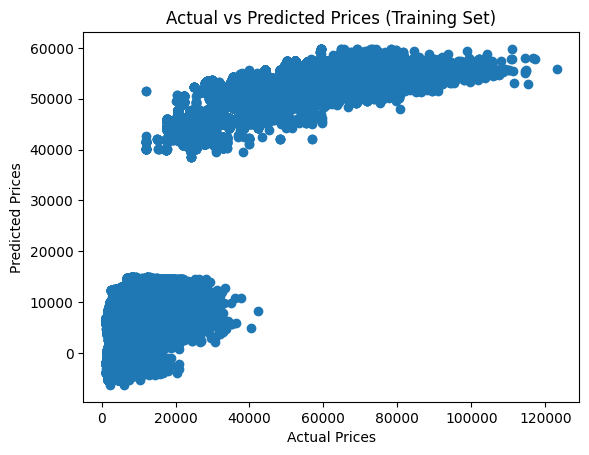

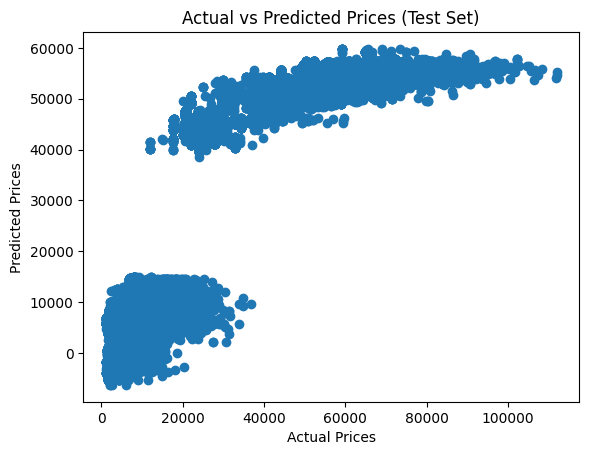

In [ ]:
# Scatter plot for training set
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Training Set)')
plt.show()

# Scatter plot for test set
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.show()

In [ ]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=10)

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [ ]:
y_train_pred_rf = rf_reg.predict(X_train)

# Predict on test set
y_test_pred_rf = rf_reg.predict(X_test)

# Calculate MSE
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

# Calculate MAE
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Calculate R2 score
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Regression Training MSE:", train_mse_rf)
print("Random Forest Regression Testing MSE:", test_mse_rf)
print("Random Forest Regression Training MAE:", train_mae_rf)
print("Random Forest Regression Testing MAE:", test_mae_rf)
print("Random Forest Regression Training R2 score:", train_r2_rf)
print("Random Forest Regression Testing R2 score:", test_r2_rf)

Random Forest Regression Training MSE: 19977929.93092323
Random Forest Regression Testing MSE: 20942713.001705054
Random Forest Regression Training MAE: 2854.3482323691774
Random Forest Regression Testing MAE: 2922.886003391446
Random Forest Regression Training R2 score: 0.9611881498483332
Random Forest Regression Testing R2 score: 0.9594901734090873
